# Fundamentals of plotting with Matplotlib

This notebook will cover three common patterns for plotting:
* Using pandas, e.g. `df.plot()`
* Using matplotlib directly with the *implicit* pyplot interface, e.g. `plt.plot()`
* Using matplotlib directly with the *explicit* ("object-oriented") interface, e.g. `ax.plot()`

In general, the explicit interface gives the most flexibility and control, so it is the recommended style for this tutorial.
More details about the difference between implicit and explicit styles can be found in the matplotlib documentation and blog, for example:
* https://matplotlib.org/stable/tutorials/introductory/quick_start.html#coding-styles
* https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces
* https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

It can also be useful to mix and match pandas plot functions with the explicit matplotlib style.
This gives the best of both worlds, and is a pattern that can be used with other matplotlib-based libraries as well.

## Basic imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in sample census data

We have some very simple data about the percent of the adult population (by age group)
with advanced (graduate or professional) degrees.
See the `census-data` folder for reference on how this data was downloaded.

These numbers are for California, from the 2019 ACS survey.

In [2]:
df = pd.read_csv('census-data/advanced_degree_by_age.csv')
df.head()

,age,percent
0,18 to 24 years,0.738296
1,25 to 34 years,10.713565
2,35 to 44 years,14.623810
3,45 to 64 years,12.504740
4,65 years and over,13.672428


## Plotting in pandas

When doing quick-and-dirty data exploration, plotting directly in pandas is very convenient.

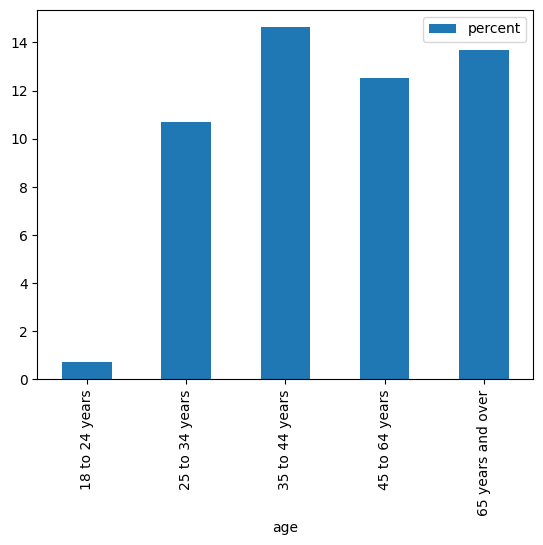

In [3]:
df.plot('age', kind='bar');

Pandas also has a wide variety of optional arguments, and can handle most common operations to customize and improve a plot.

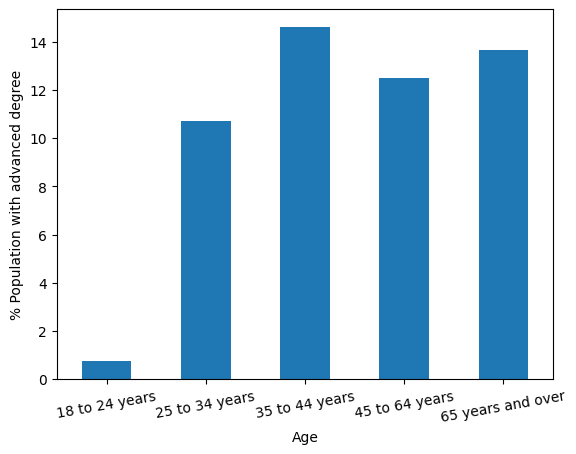

In [4]:
df.plot(
    'age',
    kind='bar',
    legend=False,
    xlabel='Age',
    ylabel='% Population with advanced degree',
    rot=10
);

## Plotting in Matplotlib *implicitly*

There are some limitations to what you can do in pandas, so it is useful to know how to plot using Matplotlib directly.
The *implicit* interface is usually the first one people encounter, and typically involves a lot of code starting with `plt.`.

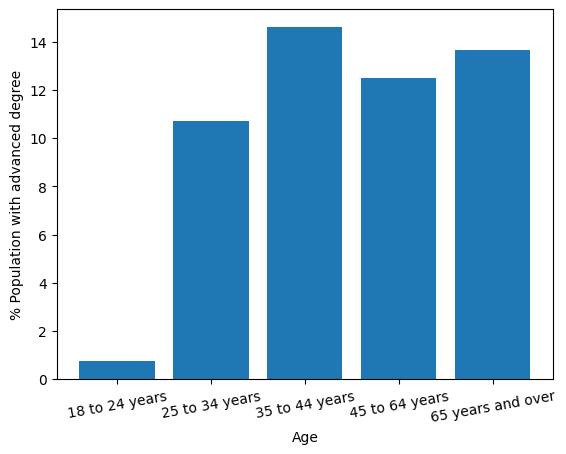

In [5]:
plt.bar(df['age'], df['percent'])
plt.xlabel('Age')
plt.xticks(rotation=10)
plt.ylabel('% Population with advanced degree');

## Plotting in Matplotlib *explicitly*

The *explicit* interface is often referred to as the *object-oriented* style, because it deals directly with the `Figure` and `Axes` objects.
Following common naming conventions is really helpful when programming in this style - 
for example, using variations on `ax` as variable names for `Axes`,
similar to how you we use `df` for Pandas `DataFrame` ojbects.
There is a bit more code required up front in this style, to initialize the plots, but it pays off in added flexibility for more complex operations.

The 'ax' variable is this type of object: <class 'matplotlib.axes._axes.Axes'>


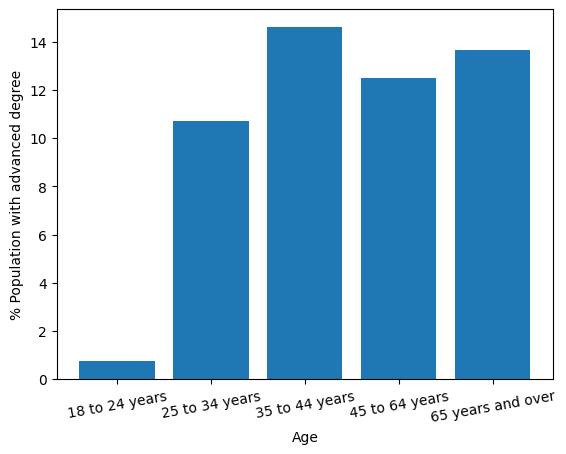

In [6]:
fig, ax = plt.subplots()
ax.bar(df['age'], df['percent'])
ax.set_xlabel('Age')
ax.tick_params(axis='x', labelrotation = 10)
ax.set_ylabel('% Population with advanced degree')
print(f"The 'ax' variable is this type of object: {type(ax)}")

### Acceptable data formats for Matplotlib

We're passing pandas `Series` objects to Matplotlib above, but internally it handles data in `numpy.array` format.
See https://matplotlib.org/stable/tutorials/introductory/quick_start.html#types-of-inputs-to-plotting-functions
for some discussion about the options for passing in data.

One particularly convenient way to pass data for those used to the pandas interface is by using the `data` argument:
```
plt.plot('x', 'y', label = 'Y', data = df)
ax.plot('x', 'y', label = 'Y', data = df)
```

Try modifying the above cells to use this style of passing data!

## Mixing and matching

In reality, most code does not follow just one of these styles.
In particular, it is common to have pandas plotting functions enhanced and customized by object-oriented style code in one of two ways:
* Capture the `Axes` object returned by pandas and operate on it
* Pass an `Axes` object to the pandas plotting function

This is extremely convenient when the pandas version of a plot "automatically" does nice things for you that you want to preserve,
like our bar chart example with the label rotation.

Pandas returned this type of object: <class 'matplotlib.axes._axes.Axes'>


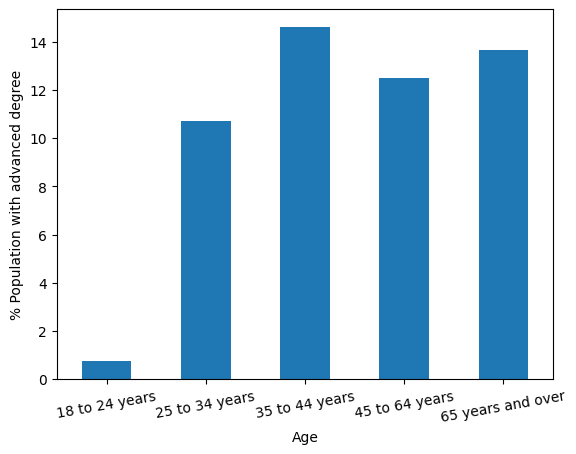

In [7]:
ax = df.plot('age', kind = 'bar', legend=False, rot=10)

# We could do these customizations easily via kwargs to df.plot()
# But later, we'll encounter situations where that is not true!
ax.set_xlabel('Age')
ax.set_ylabel('% Population with advanced degree');

# Verify what kind of object Pandas returns:
print(f"Pandas returned this type of object: {type(ax)}")

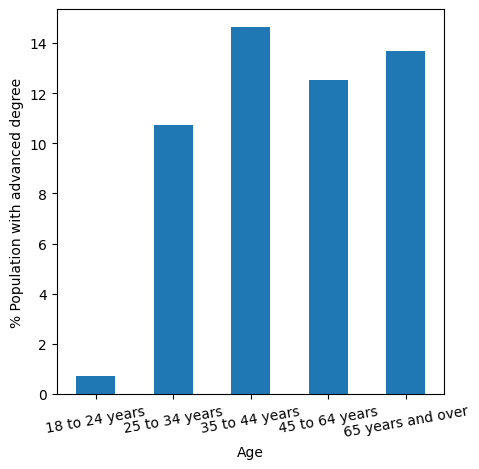

In [8]:
# Let's say we want the whole figure (including margin/label areas) to be 5 inches square
# We can create this layout first, then pass the "ax" variable into df.plot()
fig, ax = plt.subplots(figsize=(5,5))

# Notice we don't have to capture the "ax" variable output from Pandas again.
df.plot('age', kind = 'bar', ax=ax, legend=False, rot=10)

# We can still do the usual object-oriented style customizations
ax.set_xlabel('Age')
ax.set_ylabel('% Population with advanced degree');

### Suggested exercises

There are already too many possible variations to show each one, so here are some suggestions for modifying the notebook code on your own:
* Use the `type()` function to explore the data and object types, e.g. `type(df['x'])` or `type(ax)`.
* Pass data as numpy arrays, or lists, or tuples.
* Find an example in the wild (e.g. in the Matplotlib docs or on Stackoverflow) in the *implicit* style, and rewrite it in the *explicit* style. Notice where you can and cannot simply substitute `plt.` for `ax.`!

## Saving to file

One of the most important parts of creating publication-quality images is saving your plots to a file.
Matplotlib supports a variety of formats, and there are options to control image resolution.
Here is a basic example.
The figure is given a light gray color to highlight where the boundaries of the figure lie.
Saving to file is our first example of using a method on the `fig` after it's creation
(as opposed to the `ax`).

Compare what you see in the notebook to what you see in the PNG file.
Notice how in the notebook, the figure is "automatically resized" to trim extra whitespace
or add more room to accommodate long labels.
When you save to file, you have to pass `bbox_inches='tight'` to get that same behavior.

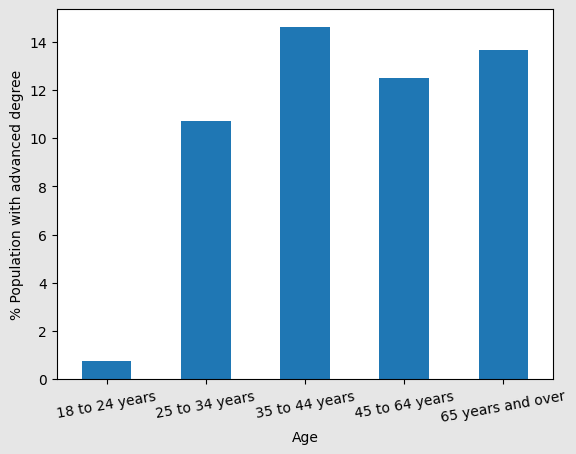

In [9]:
fig, ax = plt.subplots(facecolor='0.9')
df.plot('age', kind = 'bar', ax=ax, legend=False, rot=10, xlabel='Age')
ax.set_ylabel('% Population with advanced degree')

fig.savefig('plots/part-1-default.png');
fig.savefig('plots/part-1-tight.png', bbox_inches = 'tight');

## Where to go from here?

Now we've gone over the fundamentals of plotting with Matplotlib,
exploring the explicit and implicit coding styles
and mixing and matching with Pandas methods.
This notebook was the boring one;
now it's time to have some fun!

Next up we will look deeper at California census data
about educational attainment by age group,
and explore a variety of visualizations.